In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from PreproccessingCv import X, y

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Define the hyperparameter grid for Grid Search
param_grid = {
    'max_features': ['sqrt', 'log2', 1.0],
    'min_samples_leaf': [1, 2, 3, 7, 11],
    'n_estimators': [45, 70, 75, 80, 85, 90],
    'oob_score': [True, False],
    'max_depth': [None, 10, 20, 30],
    'max_leaf_nodes': [None, 10, 50, 100]
}

# param_grid = {
#     'max_features' : ['sqrt', 'log2', 1.0],
#     'min_samples_leaf' : [1, 2, 3, 7, 11],
#     'n_estimators': [45, 70, 75,80,85,90,100],
#     'oob_score': [True, False],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'max_leaf_nodes': [None, 10, 50, 100],
#     'min_impurity_decrease': [0.0, 0.1, 0.2],
#     'bootstrap': [True, False],
#     'warm_start': [True, False]
# }


# Create the RandomForestRegressor model
model = ExtraTreesRegressor(random_state=0)
# Perform Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_model = ExtraTreesRegressor(random_state=0, **best_params)
best_model.fit(X_train, y_train)


/home/laxman/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
4320 fits failed out of a total of 8640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4320 fits failed with the following error:
Traceback (most recent call last):
  File "/home/laxman/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/laxman/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/laxman/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    raise ValueError("Out of bag 

ExtraTreesRegressor(n_estimators=70, random_state=0)

In [11]:
import pickle

In [12]:
with open("ExtraTreesCv.pkl", "wb") as f:
    pickle.dump(best_model,f)

In [10]:
# Make predictions
predictions = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print evaluation metrics
print("Best Hyperparameters:", best_params)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Best Hyperparameters: {'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'n_estimators': 70, 'oob_score': False}
Mean Squared Error: 0.018515373779812053
Mean Absolute Error: 0.06250458518512068
R-squared: 0.9843786592287267


/tmp/ipykernel_6984/1187505282.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=imp[idx], y=incl[idx], orient="h", ci=None)


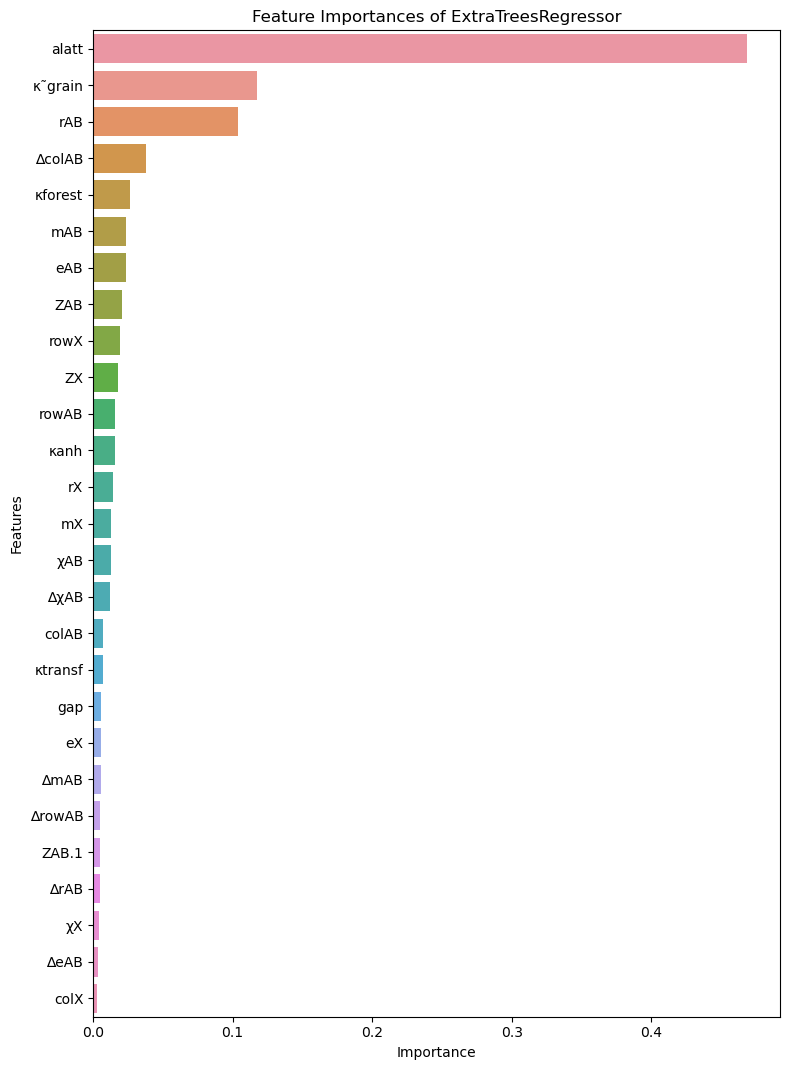

In [6]:
best_model.feature_importances_
imp = best_model.feature_importances_
incl = X.columns.values
idx = np.argsort(imp)[::-1]

# Reduce the figure width and height to make bars thinner
plt.figure(figsize=(8, len(idx) * 0.4))  # Adjust the width and height as needed

sns.barplot(x=imp[idx], y=incl[idx], orient="h", ci=None)

plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importances of ExtraTreesRegressor")
plt.tight_layout()
plt.savefig("ExtraTreesRegressorCvCs_Feature.png",dpi=300)
plt.show()

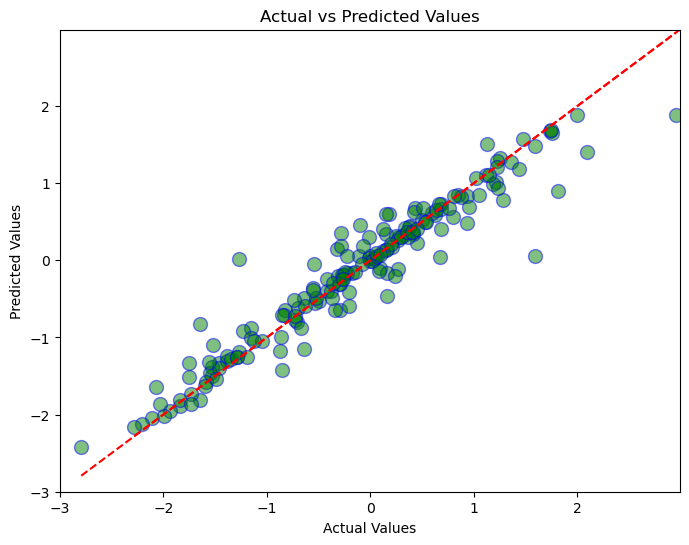

In [7]:
y_pred = best_model.predict(X_test)

# Plot predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.5,s=100,edgecolors="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
# plt.grid(True)
plt.xlim(-3,2.99)
plt.ylim(-3,2.99)
plt.show()
